# Next Word Filler (python source code)

### Importing The Required Libraries:

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [20]:
"""
    Dataset: http://www.gutenberg.org/cache/epub/5200/pg5200.txt
    Remove all the unnecessary data and label it as Metamorphosis-clean.
    The starting and ending lines should be as follows.

"""


file = open("metamorphosis_clean.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  ﻿One morning, when Gregor Samsa woke from troubled dreams, he found

The Last Line:  first to get up and stretch out her young body.


### Cleaning the data:

In [21]:
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.'

In [22]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he'

In [23]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room altho'

### Tokenization:

In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]

In [25]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2617


In [26]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  3889


array([[ 17,  53],
       [ 53, 293],
       [293,   2],
       [  2,  18],
       [ 18, 729],
       [729, 135],
       [135, 730],
       [730, 294],
       [294,   8],
       [  8, 731]])

In [27]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [28]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 17  53 293   2  18]
The responses are:  [ 53 293   2  18 729]


In [29]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the Model:

In [30]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 10)             26170     
                                                                 
 lstm_2 (LSTM)               (None, 1, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 2617)              2619617   
                                                                 
Total params: 15,694,787
Trainable params: 15,694,787
Non-trainable params: 0
_________________________________________________________________


### Plot The Model:

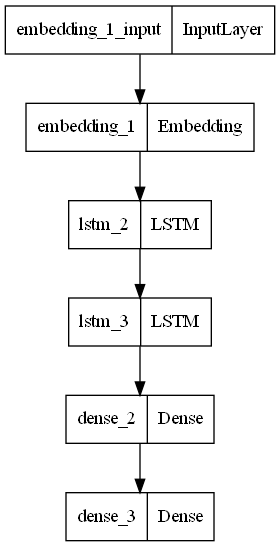

In [32]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

### Callbacks:

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

### Compile The Model:

In [34]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))

### Fit The Model:

In [35]:
model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/150
61/61 [==============================] - ETA: 0s - loss: 7.8753
Epoch 1: loss improved from inf to 7.87532, saving model to nextword1.h5
61/61 [==============================] - 25s 229ms/step - loss: 7.8753 - lr: 0.0010
Epoch 2/150
61/61 [==============================] - ETA: 0s - loss: 7.8597
Epoch 2: loss improved from 7.87532 to 7.85968, saving model to nextword1.h5
61/61 [==============================] - 21s 345ms/step - loss: 7.8597 - lr: 0.0010
Epoch 3/150
61/61 [==============================] - ETA: 0s - loss: 7.8141
Epoch 3: loss improved from 7.85968 to 7.81412, saving model to nextword1.h5
61/61 [==============================] - 15s 254ms/step - loss: 7.8141 - lr: 0.0010
Epoch 4/150
61/61 [==============================] - ETA: 0s - loss: 7.6477
Epoch 4: loss improved from 7.81412 to 7.64774, saving model to nextword1.h5
61/61 [==============================] - 14s 227ms/step - loss: 7.6477 - lr: 0.0010
Epoch 5/150
61/61 [==============================] - ETA

61/61 [==============================] - 14s 228ms/step - loss: 4.2545 - lr: 0.0010
Epoch 36/150
61/61 [==============================] - ETA: 0s - loss: 4.2065
Epoch 36: loss improved from 4.25447 to 4.20651, saving model to nextword1.h5
61/61 [==============================] - 13s 219ms/step - loss: 4.2065 - lr: 0.0010
Epoch 37/150
61/61 [==============================] - ETA: 0s - loss: 4.1494
Epoch 37: loss improved from 4.20651 to 4.14936, saving model to nextword1.h5
61/61 [==============================] - 14s 225ms/step - loss: 4.1494 - lr: 0.0010
Epoch 38/150
61/61 [==============================] - ETA: 0s - loss: 4.1058
Epoch 38: loss improved from 4.14936 to 4.10585, saving model to nextword1.h5
61/61 [==============================] - 14s 222ms/step - loss: 4.1058 - lr: 0.0010
Epoch 39/150
61/61 [==============================] - ETA: 0s - loss: 4.0194
Epoch 39: loss improved from 4.10585 to 4.01941, saving model to nextword1.h5
61/61 [==============================] - 15s

Epoch 70/150
61/61 [==============================] - ETA: 0s - loss: 2.1858
Epoch 70: loss improved from 2.23864 to 2.18577, saving model to nextword1.h5
61/61 [==============================] - 15s 244ms/step - loss: 2.1858 - lr: 0.0010
Epoch 71/150
61/61 [==============================] - ETA: 0s - loss: 2.1360
Epoch 71: loss improved from 2.18577 to 2.13602, saving model to nextword1.h5
61/61 [==============================] - 13s 220ms/step - loss: 2.1360 - lr: 0.0010
Epoch 72/150
61/61 [==============================] - ETA: 0s - loss: 2.1215
Epoch 72: loss improved from 2.13602 to 2.12154, saving model to nextword1.h5
61/61 [==============================] - 20s 328ms/step - loss: 2.1215 - lr: 0.0010
Epoch 73/150
61/61 [==============================] - ETA: 0s - loss: 2.0860
Epoch 73: loss improved from 2.12154 to 2.08597, saving model to nextword1.h5
61/61 [==============================] - 13s 220ms/step - loss: 2.0860 - lr: 0.0010
Epoch 74/150
61/61 [========================

61/61 [==============================] - ETA: 0s - loss: 0.9759
Epoch 104: loss improved from 0.98387 to 0.97586, saving model to nextword1.h5
61/61 [==============================] - 17s 275ms/step - loss: 0.9759 - lr: 2.0000e-04
Epoch 105/150
61/61 [==============================] - ETA: 0s - loss: 0.9699
Epoch 105: loss improved from 0.97586 to 0.96986, saving model to nextword1.h5
61/61 [==============================] - 15s 249ms/step - loss: 0.9699 - lr: 2.0000e-04
Epoch 106/150
61/61 [==============================] - ETA: 0s - loss: 0.9627
Epoch 106: loss improved from 0.96986 to 0.96271, saving model to nextword1.h5
61/61 [==============================] - 21s 344ms/step - loss: 0.9627 - lr: 2.0000e-04
Epoch 107/150
61/61 [==============================] - ETA: 0s - loss: 0.9608
Epoch 107: loss improved from 0.96271 to 0.96081, saving model to nextword1.h5
61/61 [==============================] - 14s 238ms/step - loss: 0.9608 - lr: 2.0000e-04
Epoch 108/150
61/61 [=============

Epoch 138/150
61/61 [==============================] - ETA: 0s - loss: 0.8581
Epoch 138: loss improved from 0.86126 to 0.85814, saving model to nextword1.h5
61/61 [==============================] - 14s 226ms/step - loss: 0.8581 - lr: 2.0000e-04
Epoch 139/150
61/61 [==============================] - ETA: 0s - loss: 0.8543
Epoch 139: loss improved from 0.85814 to 0.85429, saving model to nextword1.h5
61/61 [==============================] - 14s 221ms/step - loss: 0.8543 - lr: 2.0000e-04
Epoch 140/150
61/61 [==============================] - ETA: 0s - loss: 0.8526
Epoch 140: loss improved from 0.85429 to 0.85257, saving model to nextword1.h5
61/61 [==============================] - 21s 339ms/step - loss: 0.8526 - lr: 2.0000e-04
Epoch 141/150
61/61 [==============================] - ETA: 0s - loss: 0.8484
Epoch 141: loss improved from 0.85257 to 0.84840, saving model to nextword1.h5
61/61 [==============================] - 14s 224ms/step - loss: 0.8484 - lr: 2.0000e-04
Epoch 142/150
61/61 

In [36]:
# Importing the Libraries

from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer

model = load_model('nextword1.h5')
tokenizer = pickle.load(open('tokenizer1.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):
    """
        In this function we are using the tokenizer and models trained
        and we are creating the sequence of the text entered and then
        using our model to predict and return the the predicted word.
    
    """
    for i in range(3):
        sequence = tokenizer.texts_to_sequences([text])[0]
        sequence = np.array(sequence)
        
        preds = model.predict_classes(sequence)
#         print(preds)
        predicted_word = ""
        
        for key, value in tokenizer.word_index.items():
            if value == preds:
                predicted_word = key
                break
        
        print(predicted_word)
        return predicted_word

In [ ]:
"""
    We are testing our model and we will run the model
    until the user decides to stop the script.
    While the script is running we try and check if 
    the prediction can be made on the text. If no
    prediction can be made we just continue.

"""

# text1 = "at the dull"
# text2 = "collection of textile"
# text3 = "what a strenuous"
# text4 = "stop the script"

while(True):

    text = input("Enter your line: ")
    
    if text == "stop the script":
        print("Ending The Program.....")
        break
    
    else:
        try:
            text = text.split(" ")
            text = text[-1]

            text = ''.join(text)
            Predict_Next_Words(model, tokenizer, text)
            
        except:
            continue